In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
W_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0, 3, 130)

y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

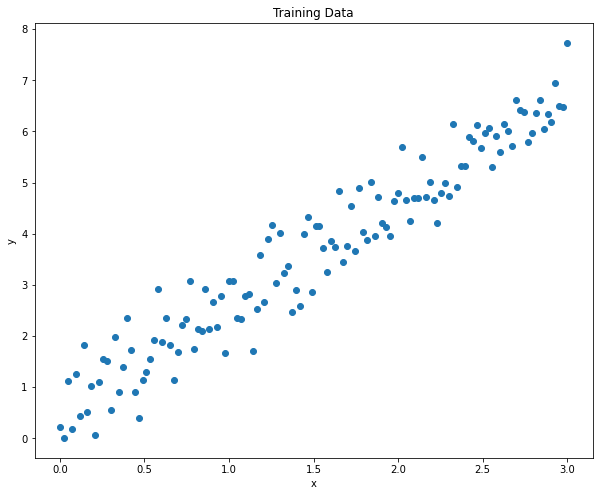

In [4]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')

plt.title("Training Data")
plt.show()

In [5]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name="W")
        self.bias = tf.Variable(np.random.randn(), name = "b")

    def __call__(self, x):
        return self.weight * x + self.bias

In [6]:
def loss(y, y_pred):
        return tf.reduce_mean(tf.square(y - y_pred))

In [7]:
def train(linear_model, x, y, lr = 0.01):

    with tf.GradientTape() as tape:

        y_pred = linear_model(x)

        current_loss = loss(y, y_pred)
    
    d_weight, d_bias = tape.gradient(current_loss,
                                     [linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

In [8]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100

lr = 0.15

In [9]:
for epoch_count in range(epochs):

    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())

    real_loss = loss(y, linear_model(x))

    train(linear_model, x, y, lr = lr)

    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 3.144609212875366
Epoch count 1: Loss value: 0.31434330344200134
Epoch count 2: Loss value: 0.2559323012828827
Epoch count 3: Loss value: 0.25464770197868347
Epoch count 4: Loss value: 0.25454968214035034
Epoch count 5: Loss value: 0.2544844150543213
Epoch count 6: Loss value: 0.25442713499069214
Epoch count 7: Loss value: 0.2543765604496002
Epoch count 8: Loss value: 0.25433191657066345
Epoch count 9: Loss value: 0.25429239869117737
Epoch count 10: Loss value: 0.254257470369339
Epoch count 11: Loss value: 0.2542266249656677
Epoch count 12: Loss value: 0.254199355840683
Epoch count 13: Loss value: 0.2541752755641937
Epoch count 14: Loss value: 0.2541539967060089
Epoch count 15: Loss value: 0.2541351616382599
Epoch count 16: Loss value: 0.25411859154701233
Epoch count 17: Loss value: 0.2541038691997528
Epoch count 18: Loss value: 0.2540908753871918
Epoch count 19: Loss value: 0.2540794014930725
Epoch count 20: Loss value: 0.2540692985057831
Epoch count 21: Los

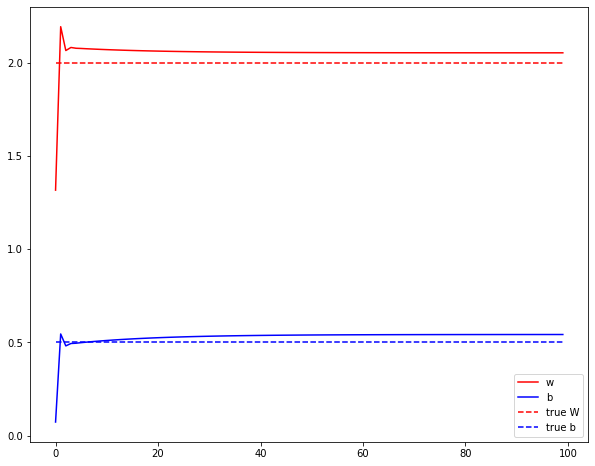

In [10]:
plt.figure(figsize=(10, 8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['w', 'b', 'true W', 'true b'])

In [11]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(2.0526996, 0.5422345)

In [12]:
rmse = loss(y, linear_model(x))

rmse.numpy()

0.25399226

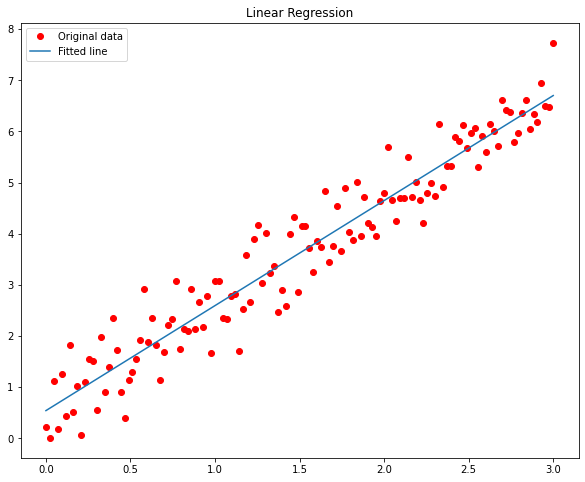

In [13]:
plt.figure(figsize=(10, 8))

plt.plot(x, y, 'ro', label = 'Original data')
plt.plot(x, linear_model(x), label = 'Fitted line')

plt.title('Linear Regression')

plt.legend()
plt.show()

In [14]:
from tensorflow import keras
from tensorflow.keras import layers 

In [15]:
x.shape, y.shape

((130,), (130,))

In [16]:
x = pd.DataFrame(x, columns = ['x'])
y = pd.DataFrame(y, columns = ['y'])

x

,x
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023
...,...
125,2.906977
126,2.930233
127,2.953488
128,2.976744


In [17]:
y

,y
0,0.222073
1,0.006147
2,1.122797
3,0.176019
4,1.249099
...,...
125,6.187147
126,6.951075
127,6.500086
128,6.467128


In [18]:
model = keras.Sequential([layers.Dense(1, input_shape = (1,), activation = 'linear')])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss = 'mse', metrics = ['mse'], optimizer=optimizer)

In [19]:
model.fit(x, y, epochs=1000)

====] - 0s 3ms/step - loss: 0.2540 - mse: 0.2540
Epoch 791/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2541 - mse: 0.2541
Epoch 792/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2542 - mse: 0.2542
Epoch 793/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2540 - mse: 0.2540
Epoch 794/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2541 - mse: 0.2541
Epoch 795/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2541 - mse: 0.2541
Epoch 796/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2541 - mse: 0.2541
Epoch 797/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2541 - mse: 0.2541
Epoch 798/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2541 - mse: 0.2541
Epoch 799/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2541 - mse: 0.2541
Epoch 800/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2540 - mse: 0.2540
E

In [20]:
y_pred = model.predict(x)

y_pred

array([[0.54584944],
       [0.5934151 ],
       [0.6409807 ],
       [0.68854636],
       [0.736112  ],
       [0.7836777 ],
       [0.8312433 ],
       [0.878809  ],
       [0.92637455],
       [0.97394025],
       [1.0215058 ],
       [1.0690715 ],
       [1.1166372 ],
       [1.1642028 ],
       [1.2117684 ],
       [1.2593341 ],
       [1.3068998 ],
       [1.3544655 ],
       [1.402031  ],
       [1.4495966 ],
       [1.4971623 ],
       [1.5447279 ],
       [1.5922936 ],
       [1.6398593 ],
       [1.6874249 ],
       [1.7349905 ],
       [1.7825562 ],
       [1.8301218 ],
       [1.8776875 ],
       [1.9252532 ],
       [1.9728187 ],
       [2.0203843 ],
       [2.06795   ],
       [2.1155157 ],
       [2.1630814 ],
       [2.2106469 ],
       [2.2582126 ],
       [2.3057783 ],
       [2.353344  ],
       [2.4009094 ],
       [2.4484754 ],
       [2.4960408 ],
       [2.5436063 ],
       [2.5911722 ],
       [2.6387377 ],
       [2.6863036 ],
       [2.733869  ],
       [2.781

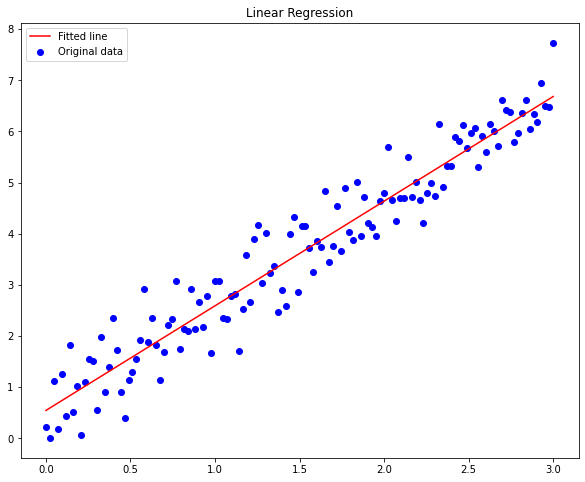

In [21]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y, c='blue', label='Original data')
plt.plot(x, y_pred, color='r', label='Fitted line')

plt.title('Linear Regression')
plt.legend()
plt.show()